In [705]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [653]:
# Import files
test = pd.read_csv('/Users/dgrijalva/kaggle/Titanic/data/test.csv')
train = pd.read_csv('/Users/dgrijalva/kaggle/Titanic/data/train.csv')

## Data Exploration

In [654]:
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

###  How many pasangers from each sex?

In [655]:
print ('Male: {}'.format(len(train[train['Sex'] == 'male'])))
print ('Female: {}'.format(len(train[train['Sex'] == 'female'])))

Male: 577
Female: 314


###  Age distribution

Age Nulls Count: 177


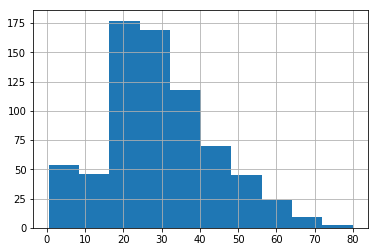

In [656]:
print ('Age Nulls Count: {}'.format(train['Age'].isnull().sum()))
train['Age'].describe()
train['Age'].hist()

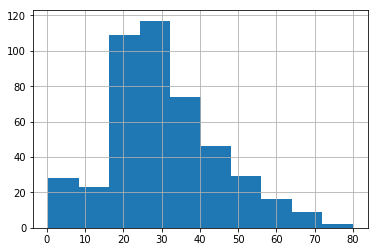

In [657]:
males_age = train['Age'][train['Sex'] == 'male']
males_age.hist()

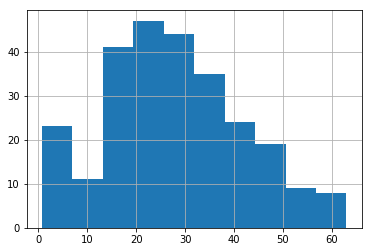

In [658]:
females_age = train['Age'][train['Sex'] == 'female']
females_age.hist()

In [659]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [660]:
gender_grp = train[['Sex','Age']].groupby(['Sex',]).mean()

In [661]:
gender_grp

,Age
Sex,
female,27.915709
male,30.726645


In [662]:
surviving_grp = train[train['Survived'] == 1]
surviving_grp = surviving_grp[['Sex','Age']].groupby(['Sex']).mean()
surviving_grp

,Age
Sex,
female,28.847716
male,27.276022


### Fare exploration

In [663]:
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

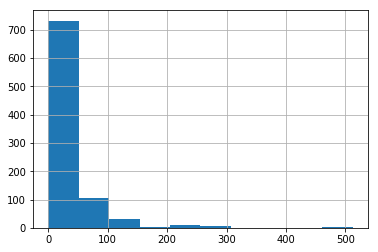

In [664]:
train['Fare'].hist()

###  Passanger Class exploration

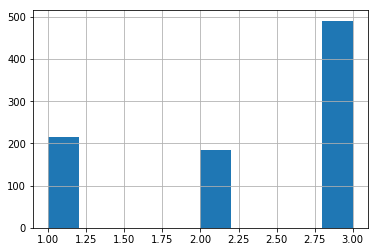

In [665]:
train['Pclass'].hist()

In [666]:
print('1st: {}'.format(len(train[train['Pclass'] == 1])))
print('2nd: {}'.format(len(train[train['Pclass'] == 2])))
print('3rd: {}'.format(len(train[train['Pclass'] == 3])))
print ('Null: {}'.format(train['Pclass'].isnull().sum()))

1st: 216
2nd: 184
3rd: 491
Null: 0


In [667]:
class_age_grp = train[['Sex','Age','Pclass']].groupby(['Pclass','Sex']).mean()
class_age_grp

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

In [668]:
class_grp = train[['Sex','Pclass','PassengerId']].groupby(['Pclass','Sex']).count()
class_grp

PassengerId
Pclass Sex                
1      female           94
       male            122
2      female           76
       male            108
3      female          144
       male            347

In [669]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Survival Correlations 

In [670]:
train[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived',
                                                                                    ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [671]:
train[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', 
                                                                              ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [672]:
train[['SibSp','Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', 
                                                                                  ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [673]:
train[['Parch','Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', 
                                                                                  ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


### Prepare  features (train and test DF)

In [674]:
datasets = [train,test]

In [675]:
for dataset in datasets:
    dataset['Sex'] = dataset['Sex'].map({'male': 0, 'female': 1}).astype(int)

In [676]:
for dataset in datasets:
    dataset['Embarked'] = dataset['Embarked'].map({'S':0,'C':1,'Q':2}).fillna(0).astype(int)

In [677]:
# fill age NaN with a value
age_avg = train['Age'].mean().astype(int)
print ('Age avg: {}'.format(age_avg))
print ('Age Null: {}'.format(train['Age'].isnull().sum()))
train['Age'] = train['Age'].fillna(age_avg)
print ('After Age Null: {}'.format(train['Age'].isnull().sum()))

print ('Age Null: {}'.format(train['Age'].isnull().sum()))
test['Age'] = test['Age'].fillna(age_avg)
print ('After Age Null: {}'.format(test['Age'].isnull().sum()))



Age avg: 29
Age Null: 177
After Age Null: 0
Age Null: 0
After Age Null: 0


In [678]:
train['AgeRange'] = pd.cut(train['Age'],4)
train[['AgeRange','Survived']].groupby('AgeRange', as_index = False).mean().sort_values(by='Survived',
                                                                     ascending=False)

,AgeRange,Survived
0,"(0.34, 20.315]",0.458101
2,"(40.21, 60.105]",0.390625
1,"(20.315, 40.21]",0.364769
3,"(60.105, 80.0]",0.227273


In [679]:
for dataset in datasets:
    dataset.loc[ dataset['Age'] <= 20 , 'Age'] = 0
    dataset.loc[(dataset['Age'] > 20) & (dataset['Age'] <=40), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 60), 'Age'] = 2
    dataset.loc[ dataset['Age'] > 60, 'Age'] = 3

In [680]:
train['Age'] = train['Age'].astype(int)
test['Age'] = test['Age'].astype(int)

In [681]:
# age correlation:
train[['Age','Survived']].groupby('Age', as_index = False).mean().sort_values(by='Survived',
                                                                             ascending=False)

,Age,Survived
0,0,0.458101
2,2,0.390625
1,1,0.364769
3,3,0.227273


In [682]:
for dataset in datasets:
    dataset['Family'] = dataset['SibSp'] + dataset['Parch'] + 1
    

In [683]:
train[['Family','Survived']].groupby('Family', as_index = False).mean()

,Family,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [684]:
for dataset in datasets:
    dataset['Alone'] = 0
    dataset.loc[dataset['Family'] ==1, 'Alone' ] = 1 

In [685]:
# Family Correlation:
train[['Alone','Survived']].groupby('Alone', as_index = False).mean().sort_values(by='Survived',
                                                                             ascending=False)

,Alone,Survived
0,0,0.505650
1,1,0.303538


In [686]:
# fill fare Na
fare_median = train['Fare'].median().astype(int)
print ('Fare Median: {}'.format(fare_median))
train['Fare'] = train['Fare'].fillna(fare_median)

test_fare_median = test['Fare'].median().astype(int)
print ('Fare Median: {}'.format(test_fare_median))
test['Fare'] = test['Fare'].fillna(test_fare_median)


Fare Median: 14
Fare Median: 14


In [687]:
train['FareRange'] = pd.qcut(train['Fare'],5)
train[['FareRange','Survived']].groupby('FareRange', as_index = False).mean().sort_values(by='FareRange',
                                                                             ascending=True)

,FareRange,Survived
0,"(-0.001, 7.854]",0.217877
1,"(7.854, 10.5]",0.201087
2,"(10.5, 21.679]",0.424419
3,"(21.679, 39.688]",0.444444
4,"(39.688, 512.329]",0.642045


In [688]:
for dataset in datasets:
    dataset.loc[dataset['Fare'] <= 7.854, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] <= 10.5 ) & (dataset['Fare'] > 7.854), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] <= 21.679) & (dataset['Fare'] > 10.5), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] <= 39.688) & (dataset['Fare'] > 21.679), 'Fare'] = 3
    dataset.loc[(dataset['Fare'] <= 512.239) & (dataset['Fare'] > 39.688), 'Fare'] = 4
train['Fare'] = train['Fare'].astype(int)    
test['Fare'] = test['Fare'].astype(int)    

In [689]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeRange,Family,Alone,FareRange
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,NaN,0,"(20.315, 40.21]",2,0,"(-0.001, 7.854]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,1,0,PC 17599,4,C85,1,"(20.315, 40.21]",2,0,"(39.688, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,1,NaN,0,"(20.315, 40.21]",1,1,"(7.854, 10.5]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,1,0,113803,4,C123,0,"(20.315, 40.21]",2,0,"(39.688, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",0,1,0,0,373450,1,NaN,0,"(20.315, 40.21]",1,1,"(7.854, 10.5]"
5,6,0,3,"Moran, Mr. James",0,1,0,0,330877,1,NaN,2,"(20.315, 40.21]",1,1,"(7.854, 10.5]"
6,7,0,1,"McCarthy, Mr. Timothy J",0,2,0,0,17463,4,E46,0,"(40.21, 60.105]",1,1,"(39.688, 512.329]"
7,8,0,3,"Palsson, Master. Gosta Leonard",0,0,3,1,349909,2,NaN,0,"(0.34, 20.315]",5,0,"(10.5, 21.679]"
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,1,0,2,347742,2,NaN,0,"(20.315, 40.21]",3,0,"(10.5, 21.679]"
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,0,1,0,237736,3,NaN,1,"(0.34, 20.315]",2,0,"(21.679, 39.688]"


In [690]:
# use regex to select titles
# examples: Mr, Miss, Mrs. 
for dataset in datasets:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand = False)
pd.crosstab(train['Title'],train['Sex'])    

Sex,0,1
Title,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


In [691]:
for dataset in datasets:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
         'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
for dataset in datasets:
    dataset['Title'] = dataset['Title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
)
    dataset['Title'] = dataset['Title'].fillna(0)


    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()



,Title,Survived
0,1,0.156673
1,2,0.702703
2,3,0.793651
3,4,0.575000
4,5,0.347826


In [693]:
# drop columns
train = train.drop(['PassengerId','Name','Ticket','AgeRange','FareRange','Cabin'], axis=1)
test = test.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)

In [696]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Alone,Title
0,0,3,0,1,1,0,0,0,2,0,1
1,1,1,1,1,1,0,4,1,2,0,3
2,1,3,1,1,0,0,1,0,1,1,2
3,1,1,1,1,1,0,4,0,2,0,3
4,0,3,0,1,0,0,1,0,1,1,1


## Prepare Prediction Model

In [717]:
X_train = train.drop('Survived', axis=1).copy()
Y_train = train['Survived'].copy()
X_test = test

In [724]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print('Decision Tree Accuracy Score: {}%'.format(acc_decision_tree))

Decision Tree Accuracy Score: 89.11%
